# Cascade Classifier Training
## Introduction

Working with a boosted cascade of weak classifiers includes two major stages: the training and the detection stage. The detection stage using either HAAR or LBP based models, is described in the object detection tutorial. This documentation gives an overview of the functionality needed to train your own boosted cascade of weak classifiers. The current guide will walk through all the different stages: collecting training data, preparation of the training data and executing the actual model training.

To support this tutorial, several official OpenCV applications will be used: [opencv_createsamples](https://github.com/opencv/opencv/tree/master/apps/createsamples) and [opencv_traincascade](https://github.com/opencv/opencv/tree/master/apps/traincascade) 

In [8]:
from train_cascade import prepare_negative, prepare_positive, train_cascades
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Preparation of the training data

For training a boosted cascade of weak classifiers we need a set of positive samples (containing actual objects you want to detect) and a set of negative images (containing everything you do not want to detect). The set of negative and positive samples must be prepared manually.

### Negative Samples

Negative samples are taken from arbitrary images, not containing objects you want to detect. These negative images, from which the samples are generated, should be listed in a special negative image file containing one image path per line (can be absolute or relative). Note that negative samples and sample images are also called background samples or background images, and are used interchangeably in this document.

Described images may be of different sizes. However, each image should be equal or larger than the desired training window size (which corresponds to the model dimensions, most of the times being the average size of your object), because these images are used to subsample a given negative image into several image samples having this training window size.

Gather your negative samples (images not contain the object to detect) and put them into **`data/input_negative`** directory. Then run the code below to generate the metadata file contains the information of negative samples.

In [2]:
prepare_negative.prepare_negative()

[INFO] Started preparing negative samples...
[INFO] Finished.


### Positive samples
Positive samples are obtained from a collection of the desired object images. This collection is described by a text file similar to the background description file (negative samples metadata file). Each line of this file corresponds to an image. The first element of the line is the filename, followed by the number of object annotations, followed by numbers describing the coordinates of the objects bounding rectangles (x, y, width, height).
Put positive samples into **`data/input_positive`** directory. Then run the code below to generate the metadata file.

In [3]:
prepare_positive.prepare_positive()

[INFO] Started preparing positive samples...
[INFO] Finished.


### Vecfile
Vecfile is a binary file contains information about positive samples and background. It speeds up the training process. Run this code below to generate the vecfile.

In [5]:
train_cascades.create_vecfile()

[INFO] Started collapsing the samples into a vector file...
[INFO] Finished.


## Cascade Training 
The next step is the actual training of the boosted cascade of weak classifiers, based on the positive and negative dataset that was prepared beforehand.
The code below wraps up the process. More details can be found [here](http://docs.opencv.org/trunk/dc/d88/tutorial_traincascade.html)

Output of training process will be print on terminal (which has Jupyter Notebook Server is running on).

In [6]:
train_cascades.train_cascade(clear_previous_output=True)

[INFO] Cleared previous output.
[INFO] Started training cascade...
[INFO] Finished.


## Test the new cascade classifier
After training, we obtain a cascade classifier stored in **`data/new_cascade/cascade.xml`**. Try to test the new classifier with the code below.

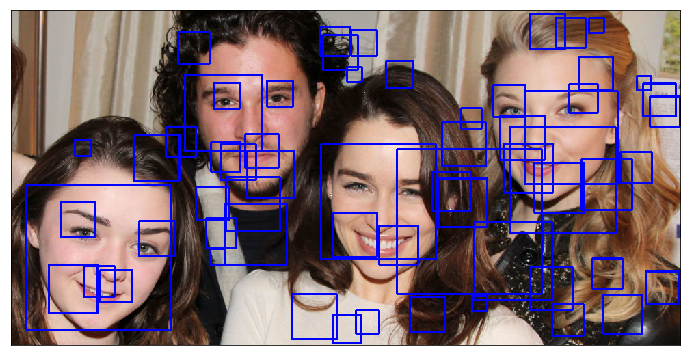

In [7]:
BLUE = (0, 0, 255)
GREEN = (0, 255, 0)
LINE_WIDTH = 2

# load cascade classifier
face_cascade = cv2.CascadeClassifier("data/new_cascade/cascade.xml")

img = mpimg.imread("images/GoT.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


# detect faces using cascade classifier
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=4)

# draw face regions
for (x, y, w, h) in faces:
    face_top_left = (x, y)
    face_right_bottom = (x + w, y + h)
    cv2.rectangle(img, face_top_left, face_right_bottom, BLUE, LINE_WIDTH)

plt.imshow(img)
plt.xticks(())
plt.yticks(())
plt.show()